In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv") #Read in dataset
data = df.values
x = data[:,0:3]
y = data[:,3]

In [3]:
theta = np.array([0.05,-3,2.5]) #Define theta and theta_0
theta_0 = np.array(0.3)

In [4]:
# Sigmoid Function
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [5]:
g = np.dot(x,theta) + theta_0
f = sigmoid(np.dot(x,theta) + theta_0)

In [6]:
print(g)
print(f)

[-1.7   0.7   3.55  1.1   0.65 -1.65 -1.55  0.55  3.65 -1.85]
[ 0.15446527  0.66818777  0.97207743  0.75026011  0.65701046  0.16110895
  0.17508627  0.63413559  0.9746673   0.1358729 ]


In [7]:
thresh_g = 0.6
thresh_f = 0.65

y_class = y
g_class = (g>thresh_g)*1
f_class = (f>thresh_f)*1

print(y_class)
print(g_class)
print(f_class)
print(" ")
error_g = np.sum(np.abs(g_class - y_class))/len(y_class)
print("Classification error for g(x) using treshold=%f is %f" % (thresh_g,error_g))

error_f = np.sum(np.abs(f_class - y_class))/len(y_class)
print("Classification error for f(x) using treshold=%f is %f" % (thresh_f,error_f))

[0 1 1 1 1 0 0 0 1 0]
[0 1 1 1 1 0 0 0 1 0]
[0 1 1 1 1 0 0 0 1 0]
 
Classification error for g(x) using treshold=0.600000 is 0.000000
Classification error for f(x) using treshold=0.650000 is 0.000000


In [8]:
def TPR(y_actual,y_pred):
    tp_rate = np.sum((y_actual==1) & (y_pred==1))/np.sum(y_actual==1)
    return(tp_rate)
    
def FPR(y_actual,y_pred):
    fp_rate = np.sum((y_actual==0) & (y_pred==1))/np.sum(y_actual==0)
    return(fp_rate)

In [9]:
thresh_vals = np.linspace(0,1,50)

In [10]:
x_data = np.zeros(len(thresh_vals))
y_data = np.zeros(len(thresh_vals))
ind = 0
for t in thresh_vals:
    ind = ind+1
    f_class = (f>t)*1
    tp_rate = TPR(y_class,f_class)
    fp_rate = FPR(y_class,f_class)
    y_data[ind-1] = tp_rate
    x_data[ind-1] = fp_rate
    

(-0.1, 1.1)

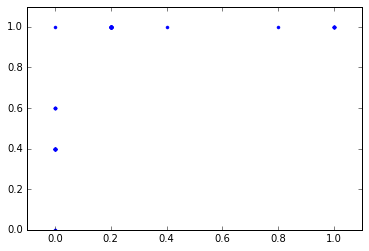

In [25]:
plt.plot(x_data, y_data,".")
plt.ylim(0, 1.1)
plt.xlim(-0.1, 1.1)